# My pokemon data science project!

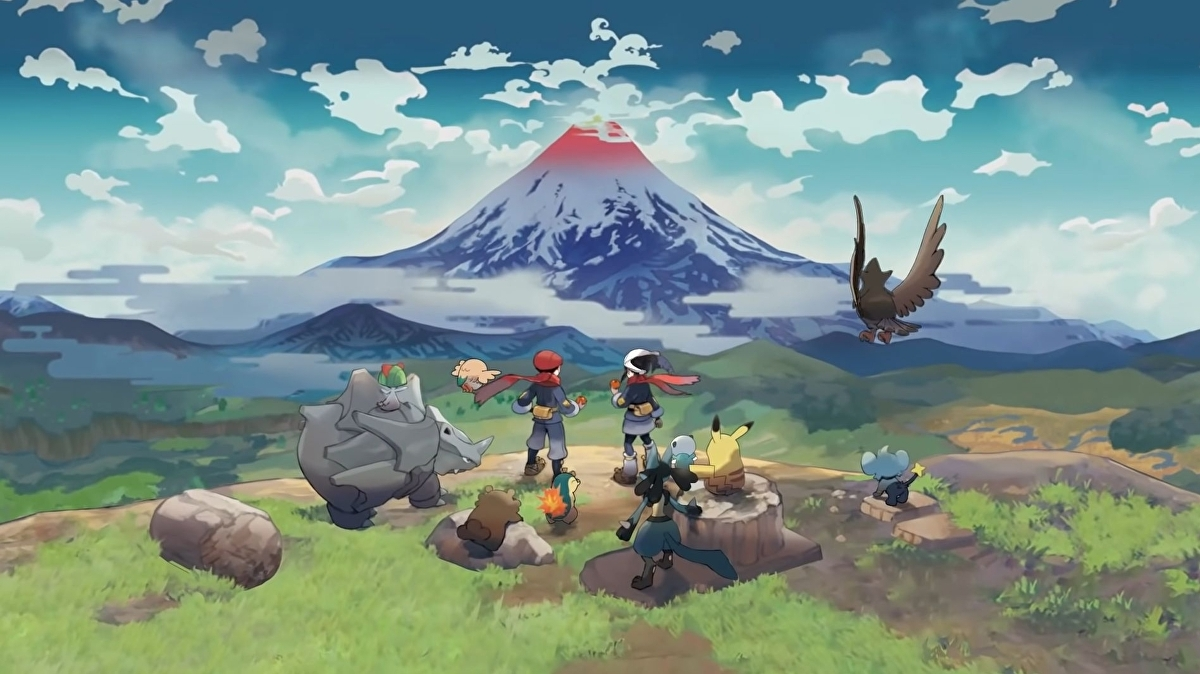

**Welcome to this little project that I have decided to take, with the objective to put to practice (and ofc learn in the way) the different knowledge and skills I have acquired in the field of data science and analysis. I hope to have a really nice time working in something that I love as it is the pokemon franchise. Special thanks to Mario Tormo Romero for posting the dataset used in this project in the Kaggle website.**

**The aim for this project will be: using the data provided, answer the following questions:**
* Is it possible to build a classifier to identify legendary Pokemon?
* How does height and weight of a Pokemon correlate with its various base stats?
* What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
* Which type is the strongest overall? Which is the weakest?
* Which type is the most likely to be a legendary Pokemon?
* Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

**The questions above were taken from Kaggle, but I will also answer some posed by me during this experiment**

**Now without more to say, lets start!**

First we will import the libraries that are usually worked with for a first exploration of the data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})

Then, let's read the csv file that contain the dataset

In [67]:
dataset = pd.read_csv('Datasets/pokedex_(Update_05.20).csv', index_col=0)

In [68]:
dataset.head(10)

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,Charizard,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Flying,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Dragon,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,Flying,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,Normal,Tiny Turtle Pokémon,1,Water,NaN,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   german_name       938 non-null    object 
 3   japanese_name     938 non-null    object 
 4   generation        1028 non-null   int64  
 5   status            1028 non-null   object 
 6   species           1028 non-null   object 
 7   type_number       1028 non-null   int64  
 8   type_1            1028 non-null   object 
 9   type_2            542 non-null    object 
 10  height_m          1028 non-null   float64
 11  weight_kg         1027 non-null   float64
 12  abilities_number  1028 non-null   int64  
 13  ability_1         1025 non-null   object 
 14  ability_2         513 non-null    object 
 15  ability_hidden    810 non-null    object 
 16  total_points      1028 non-null   float64


**So, the first thing that I would like to know is the distribution of pokemon types by region/generation (only the first type for now)**

In [81]:
def types_by_generation(dataset, generation):
    dataset_ = dataset[dataset['generation'] == generation]
    fig = sns.countplot(data=dataset_, x='type_1',
                        order=['Grass','Fire','Water','Bug','Normal','Dark','Poison','Electric','Ground',
                               'Ice','Fairy','Steel','Fighting','Psychic','Rock','Ghost','Dragon'])
    plt.xlabel('First type of pokemon')
    plt.ylabel('Count of pokemons')
    plt.title('Number of pokemons by type in generation ' + str(generation))
    plt.ylim(0, 50)
    return fig

<AxesSubplot:title={'center':'Number of pokemons by type in generation 1'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

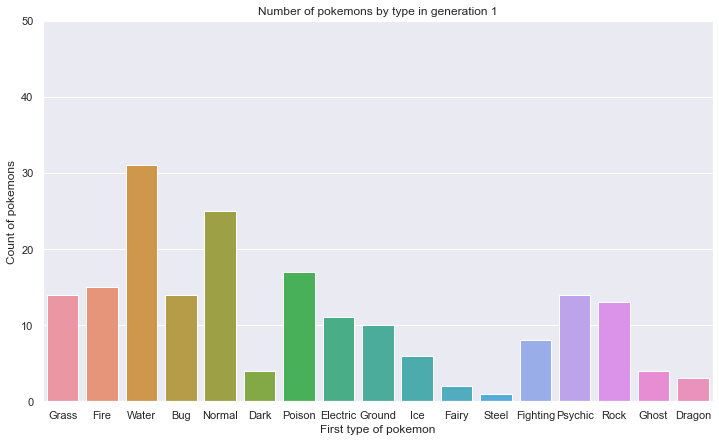

In [82]:
types_by_generation(dataset, 1)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 2'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

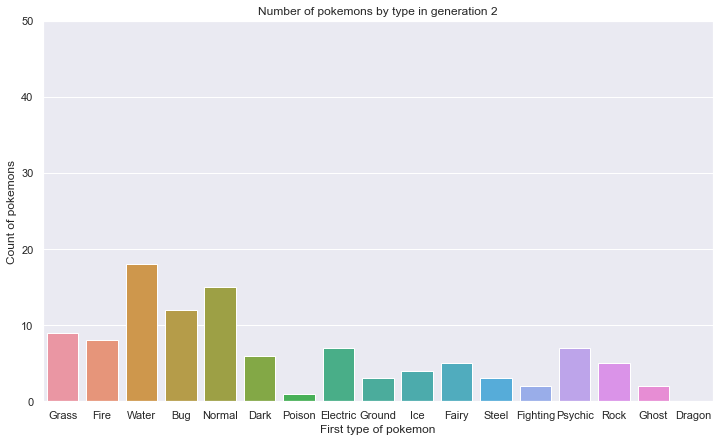

In [83]:
types_by_generation(dataset, 2)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 3'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

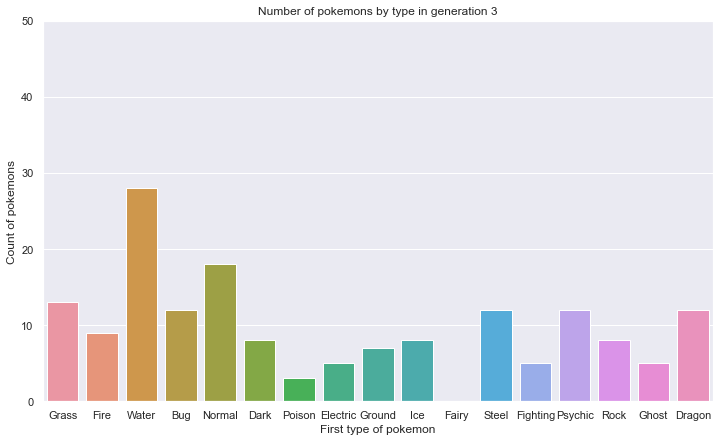

In [85]:
types_by_generation(dataset, 3)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 4'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

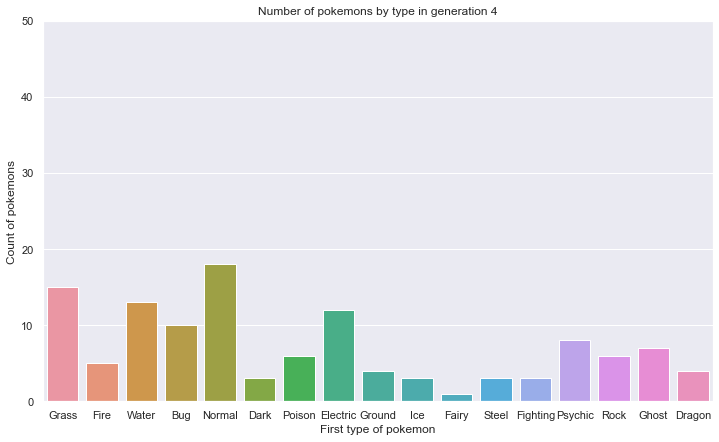

In [86]:
types_by_generation(dataset, 4)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 5'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

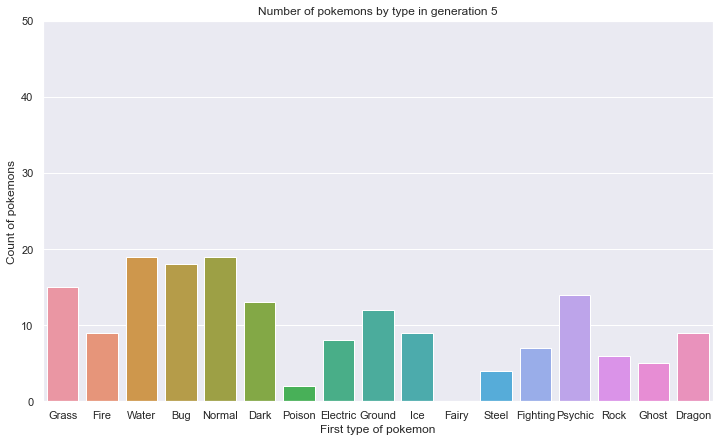

In [87]:
types_by_generation(dataset, 5)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 6'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

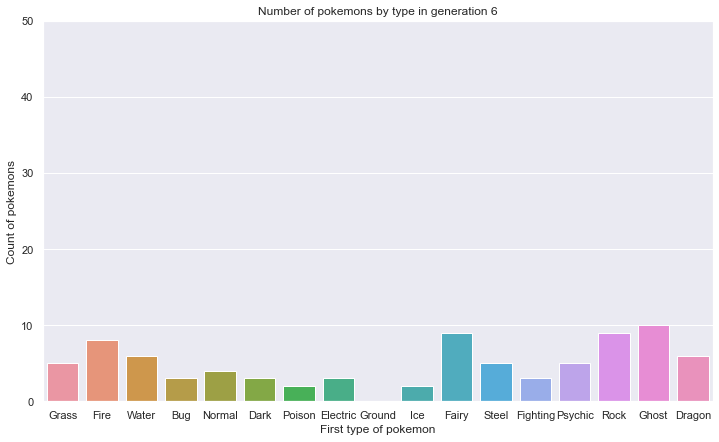

In [88]:
types_by_generation(dataset, 6)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 7'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

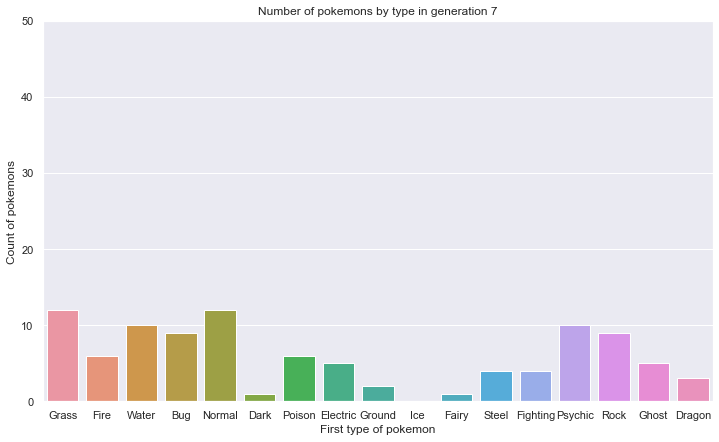

In [89]:
types_by_generation(dataset, 7)

<AxesSubplot:title={'center':'Number of pokemons by type in generation 8'}, xlabel='First type of pokemon', ylabel='Count of pokemons'>

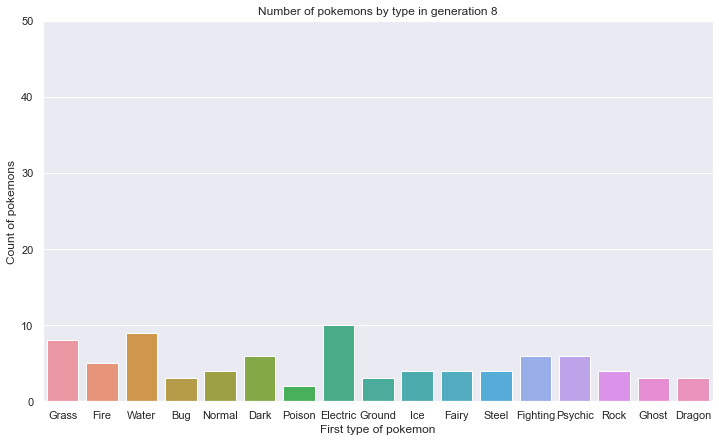

In [90]:
types_by_generation(dataset, 8)

(0.0, 50.0)

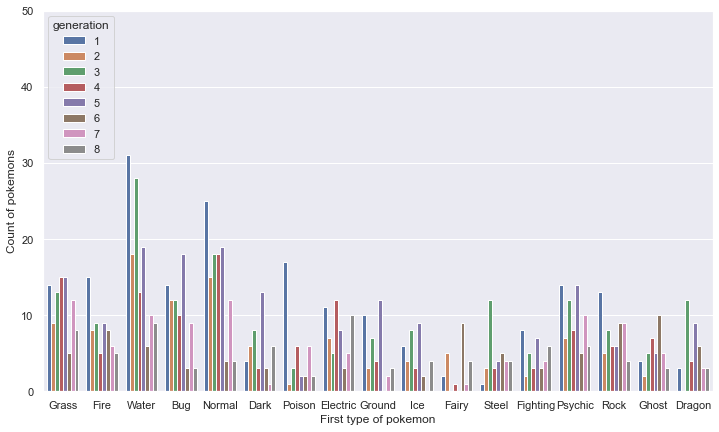

In [91]:
sns.countplot(data=dataset, x='type_1', hue='generation',
                    order=['Grass','Fire','Water','Bug','Normal','Dark','Poison','Electric','Ground',
                            'Ice','Fairy','Steel','Fighting','Psychic','Rock','Ghost','Dragon'])
plt.xlabel('First type of pokemon')
plt.ylabel('Count of pokemons')
plt.ylim(0, 50)